# Convolutional Neural Networks for the CIFAR-10 dataset

# The dataset

The dataset includes different types of images:

0. airplane
1. automobile 										
2. bird 										
3. cat 										
4. deer 										
5. dog 										
6. frog 										
7. horse 										
8. ship 										
9. truck

Image details:
+ size: 32 x 32
+ color images

Dataset details:
+ Training set: 50.000 images
+ Test set: 10.000 images


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

One of the images is shown below. It is an automobile. 

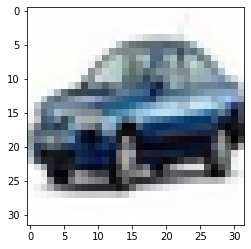

In [3]:
plt.imshow(x_train[105])

Normalizing the X train and X test.

In [4]:
x_train = x_train/x_train.max()

In [5]:
x_test = x_test/x_train.max()

In [6]:
x_train.shape

(50000, 32, 32, 3)

Converting the y_train and y_test values.

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train_categorical = to_categorical(y_train,10)

In [9]:
y_test_categorical = to_categorical(y_test,10)

## Building and training the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 16)        784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [14]:
model.fit(x_train,y_train_categorical,
          epochs=16,
          batch_size=128,
          validation_data=(x_test,y_test_categorical),
          callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/16
50000/50000 [==============================] - 26s 526us/sample - loss: 1.5924 - accuracy: 0.4254 - val_loss: 204.6583 - val_accuracy: 0.4400
Epoch 2/16
50000/50000 [==============================] - 33s 666us/sample - loss: 1.2853 - accuracy: 0.5454 - val_loss: 235.0324 - val_accuracy: 0.4255
Epoch 3/16
50000/50000 [==============================] - 33s 670us/sample - loss: 1.1534 - accuracy: 0.5953 - val_loss: 219.9748 - val_accuracy: 0.4734
Epoch 4/16
50000/50000 [==============================] - 34s 681us/sample - loss: 1.0643 - accuracy: 0.6284 - val_loss: 253.0666 - val_accuracy: 0.4574
Epoch 5/16
50000/50000 [==============================] - 34s 688us/sample - loss: 0.9918 - accuracy: 0.6530 - val_loss: 259.7594 - val_accuracy: 0.4658


## Evaluating the model

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(x_test)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.30      0.85      0.45      1000
           1       0.57      0.81      0.67      1000
           2       0.58      0.23      0.33      1000
           3       0.46      0.10      0.16      1000
           4       0.84      0.06      0.11      1000
           5       0.38      0.55      0.45      1000
           6       0.99      0.08      0.15      1000
           7       0.52      0.66      0.58      1000
           8       0.66      0.67      0.66      1000
           9       0.50      0.66      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.58      0.47      0.41     10000
weighted avg       0.58      0.47      0.41     10000



In [17]:
confusion_matrix(y_test,predictions)

array([[847,  31,   3,   1,   0,   6,   0,   4,  65,  43],
       [ 70, 808,   2,   1,   0,   1,   0,   1,  35,  82],
       [399,  39, 227,  20,   7, 166,   0,  63,  38,  41],
       [265,  62,  20,  98,   1, 316,   1,  97,  39, 101],
       [339,  62,  59,  19,  61, 149,   0, 237,  29,  45],
       [163,  31,  23,  21,   1, 554,   0, 114,  21,  72],
       [239, 116,  44,  53,   3, 188,  79,  91,  59, 128],
       [151,  23,   6,   1,   0,  61,   0, 655,   7,  96],
       [229,  50,   1,   0,   0,   5,   0,   3, 665,  47],
       [ 87, 192,   4,   1,   0,   5,   0,   4,  43, 664]], dtype=int64)